In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [33]:
#load dataset
df=pd.read_csv('/content/Obesity prediction.csv')

In [34]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [35]:
#shape
df.shape

(2111, 17)

#***EDA(Explotary Data Analysis):-***

In [36]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), object(9)
memory u

In [37]:
#descrive
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [38]:
#missing values
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [39]:
#check the Duplicated
df.duplicated().sum()

24

In [40]:
#drop the duplicated rows
df.drop_duplicates(inplace=True)

In [41]:
df.shape

(2087, 17)

In [42]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',
       'MTRANS', 'Obesity'],
      dtype='object')

In [43]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

In [44]:
df['Obesity'].value_counts()

,count
Obesity,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_II,290
Normal_Weight,282
Overweight_Level_I,276
Insufficient_Weight,267


#***Data Visualization:-***

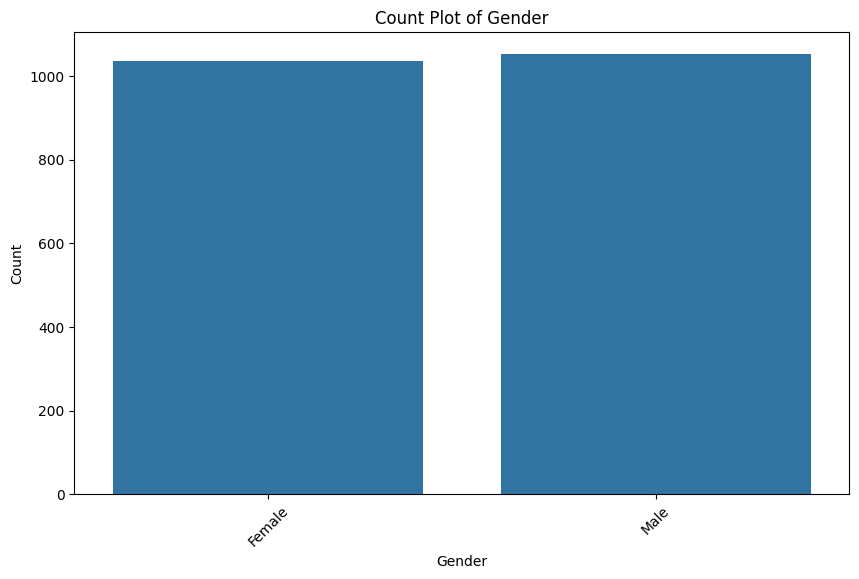

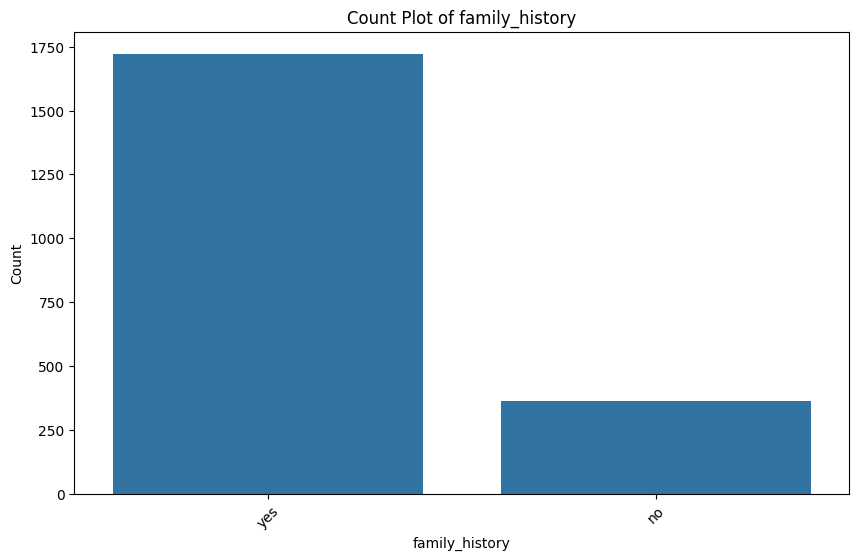

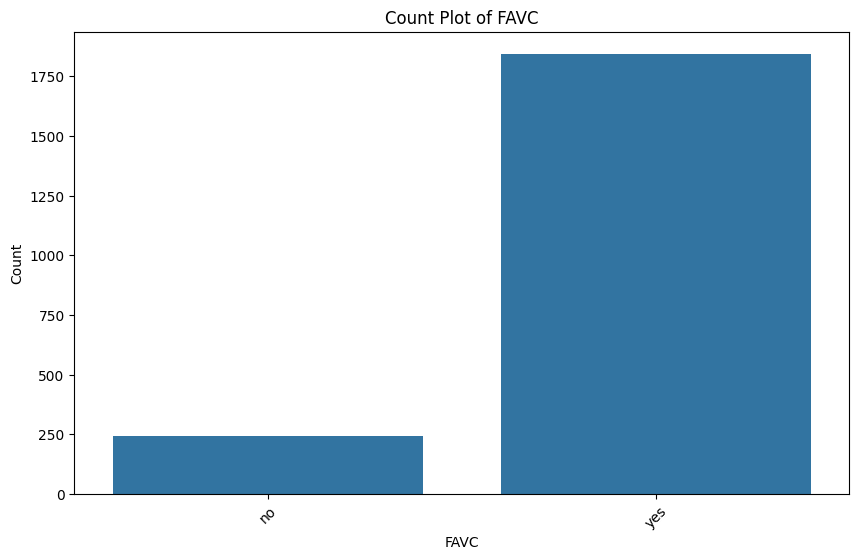

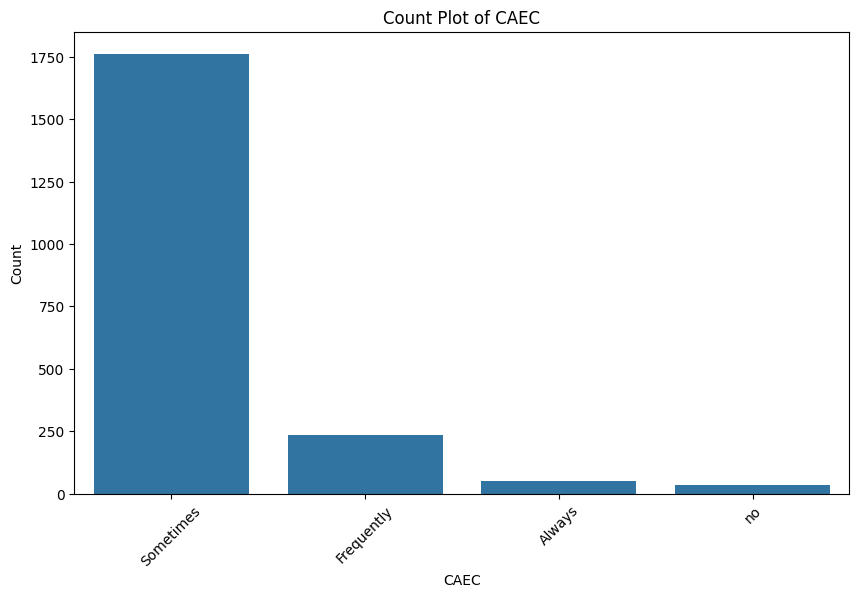

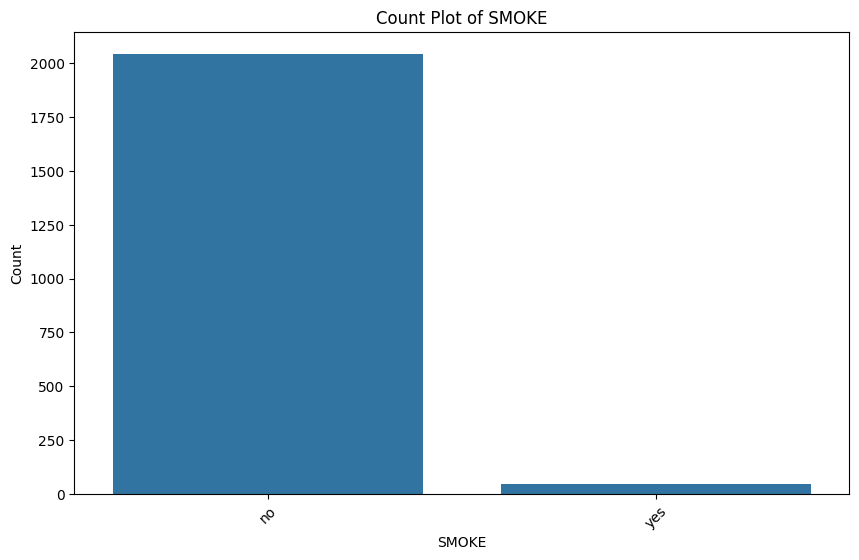

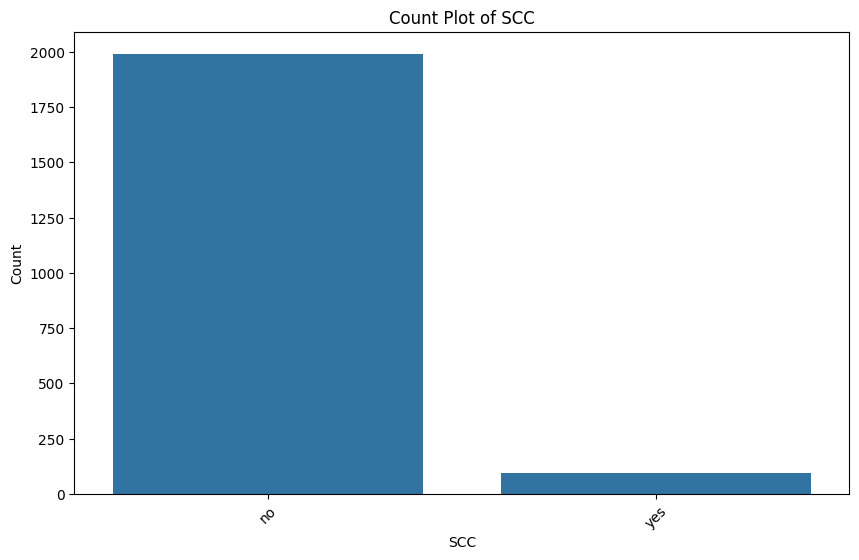

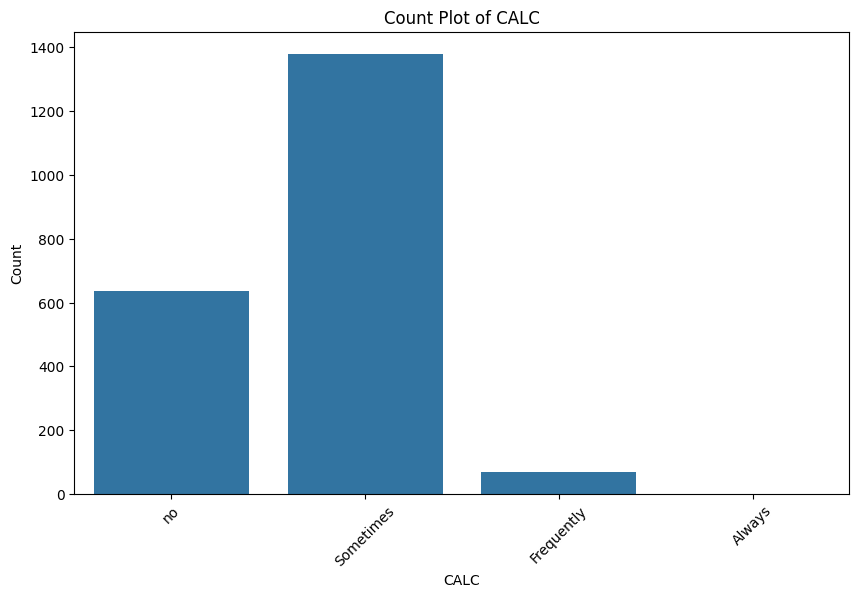

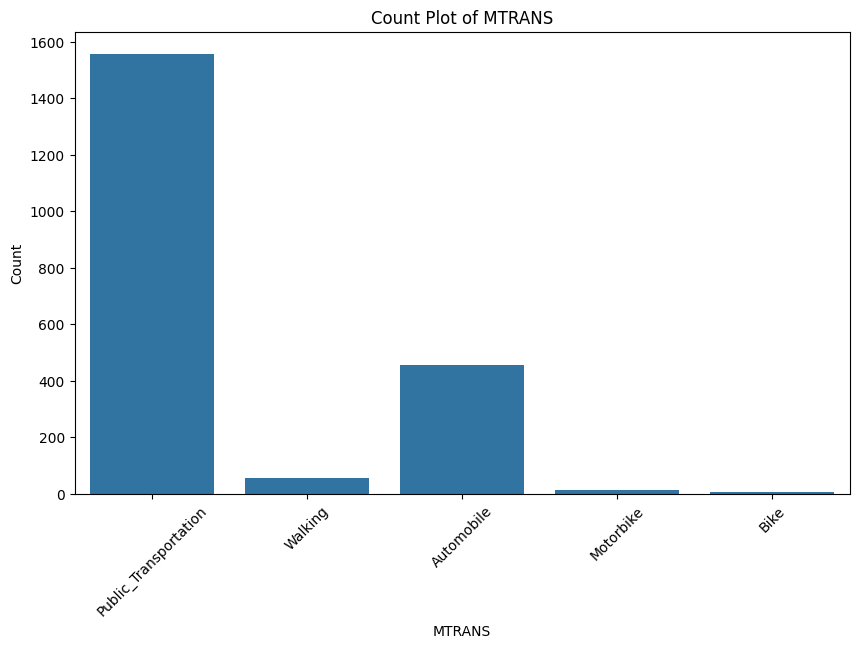

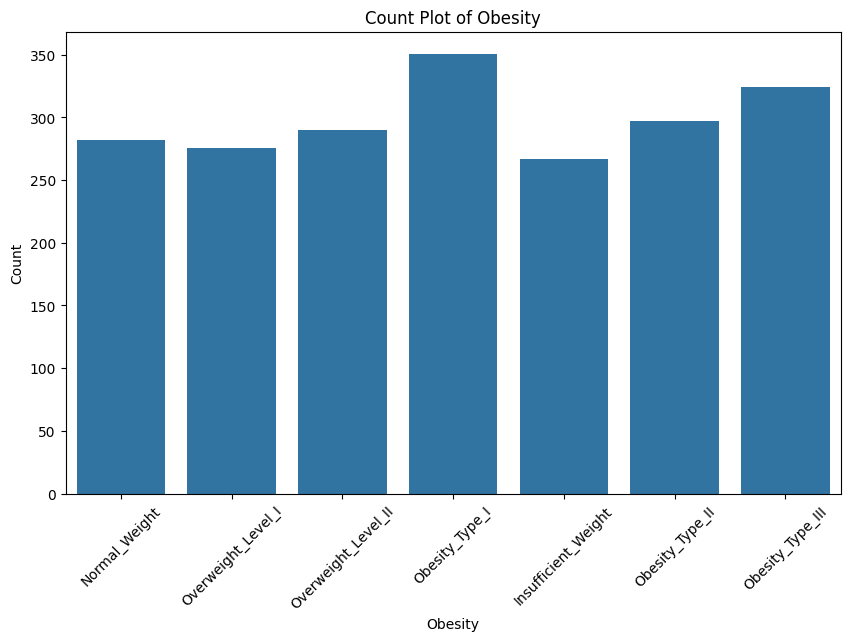

In [45]:
#visualization on category
for col in cate_col:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[col])
  plt.title(f'Count Plot of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45)
  plt.show()

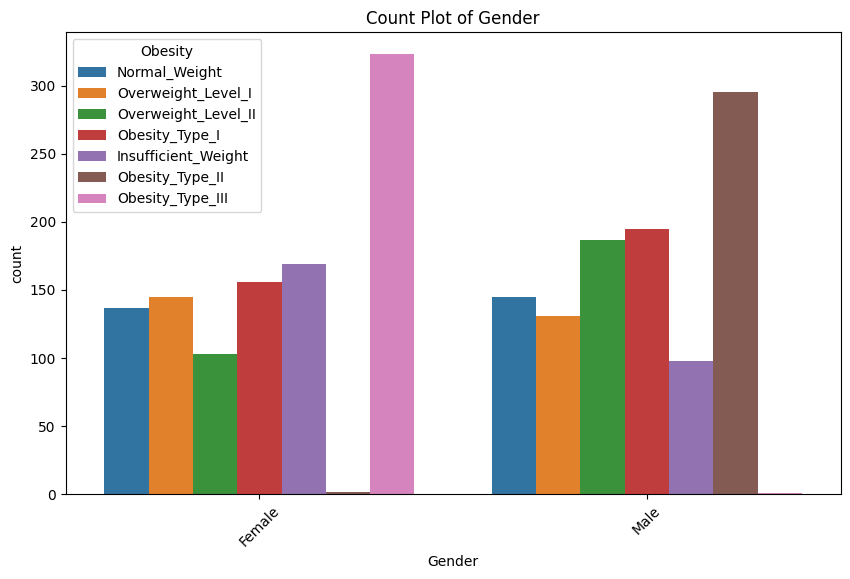

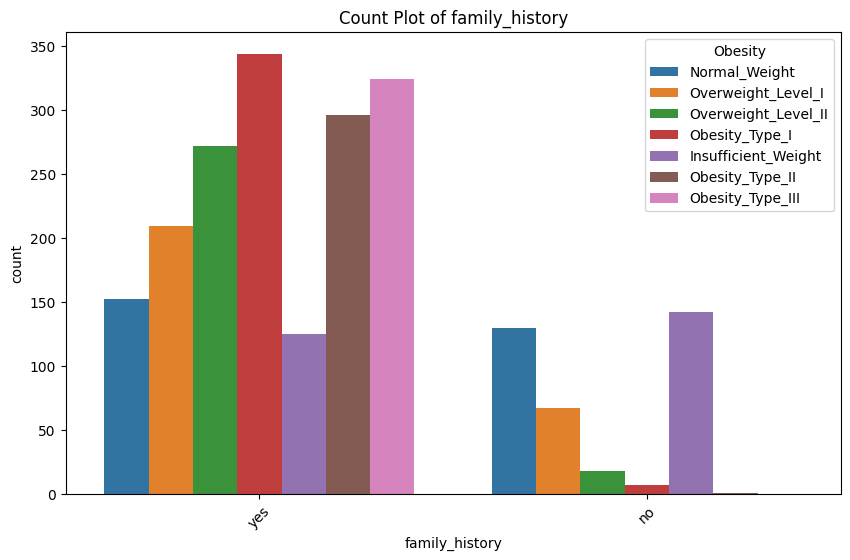

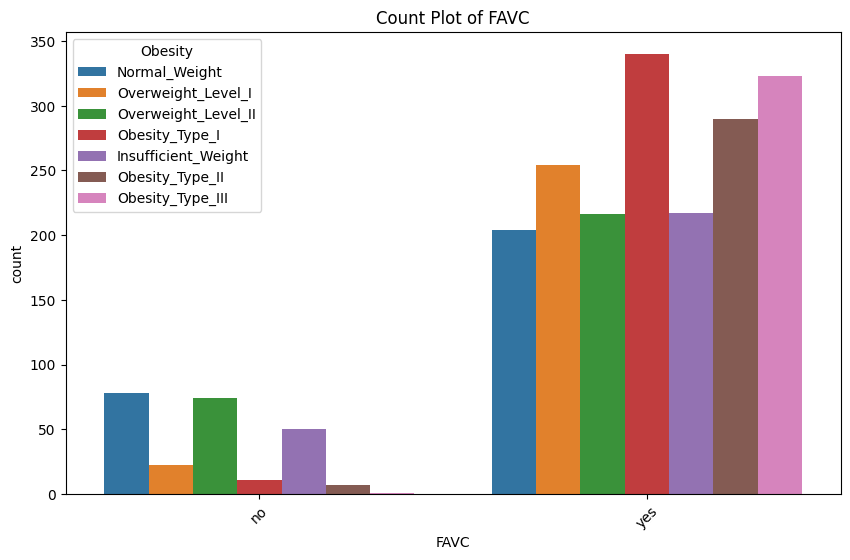

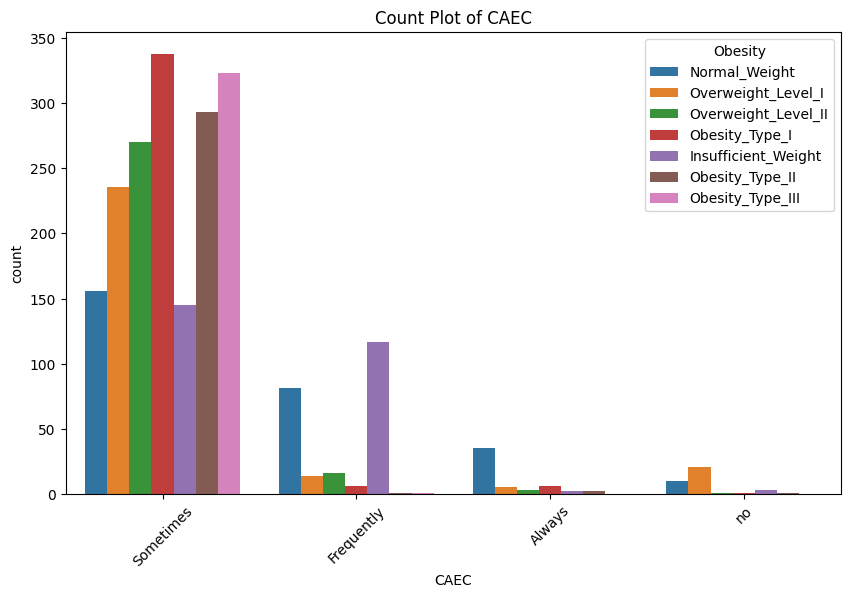

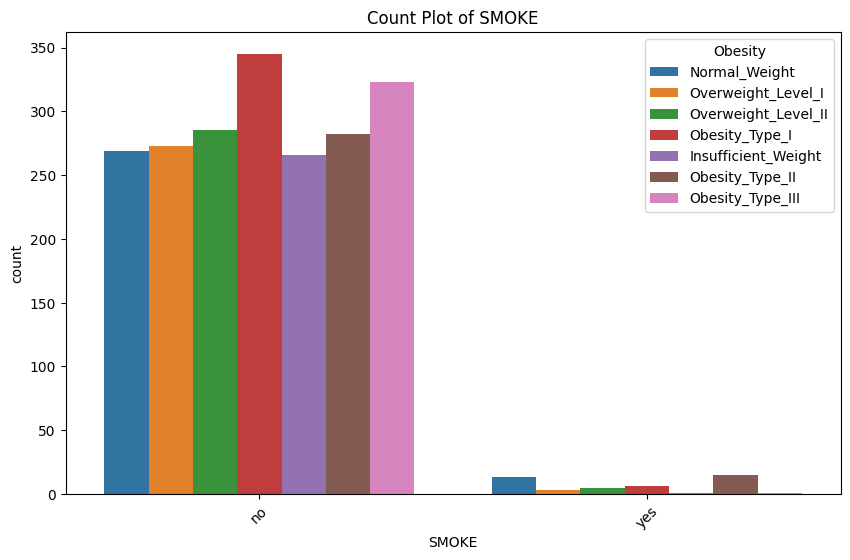

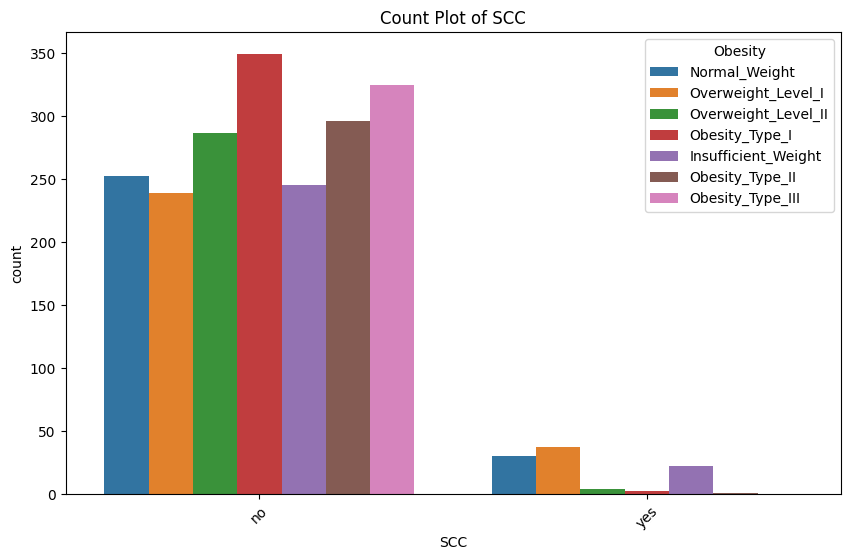

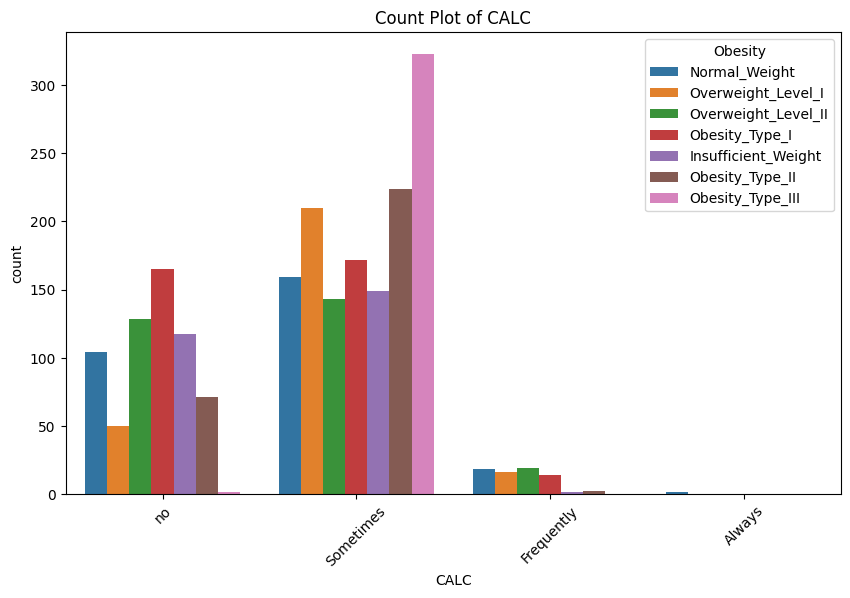

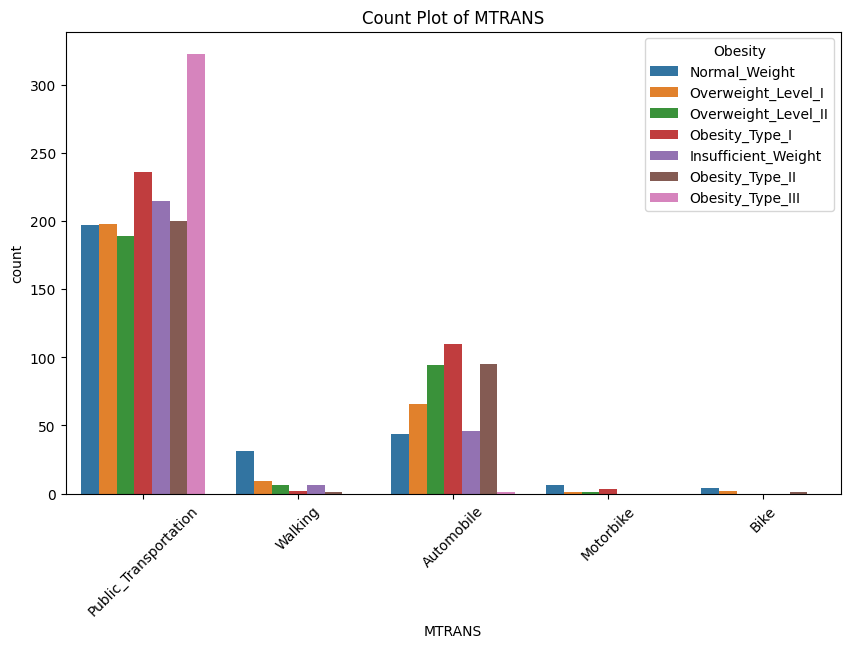

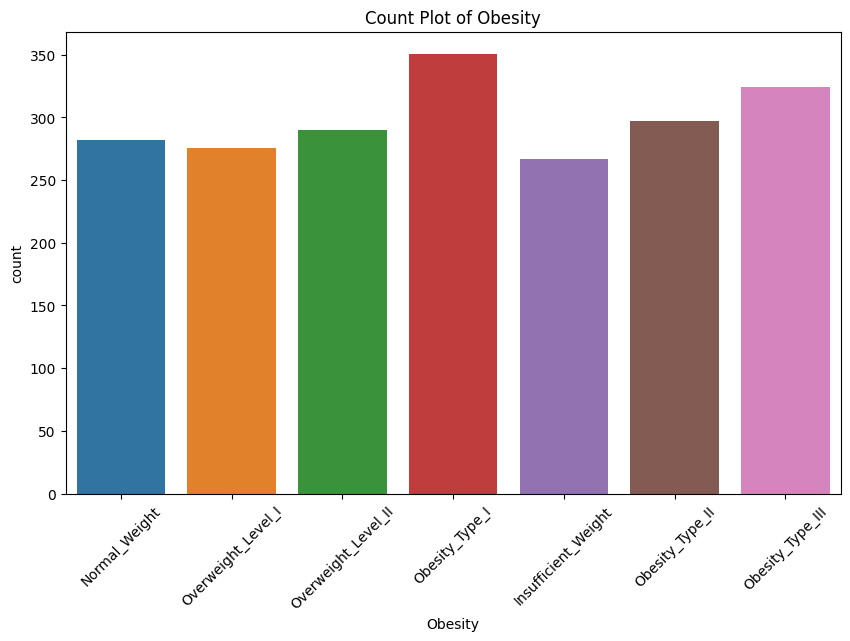

In [46]:
#comapre target column with categorical column
for col in cate_col:
  plt.figure(figsize=(10,6))
  sns.countplot(x=df[col],hue=df['Obesity'])
  plt.title(f'Count Plot of {col}')
  plt.xticks(rotation=45)
  plt.show()

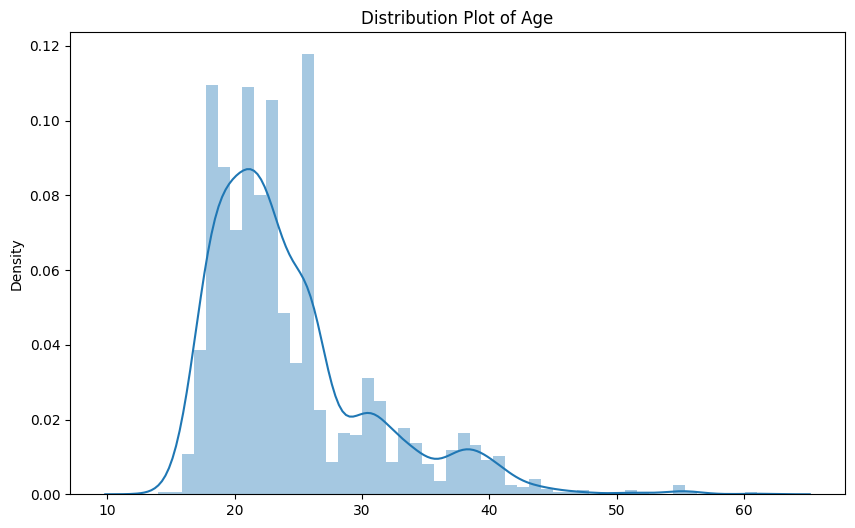

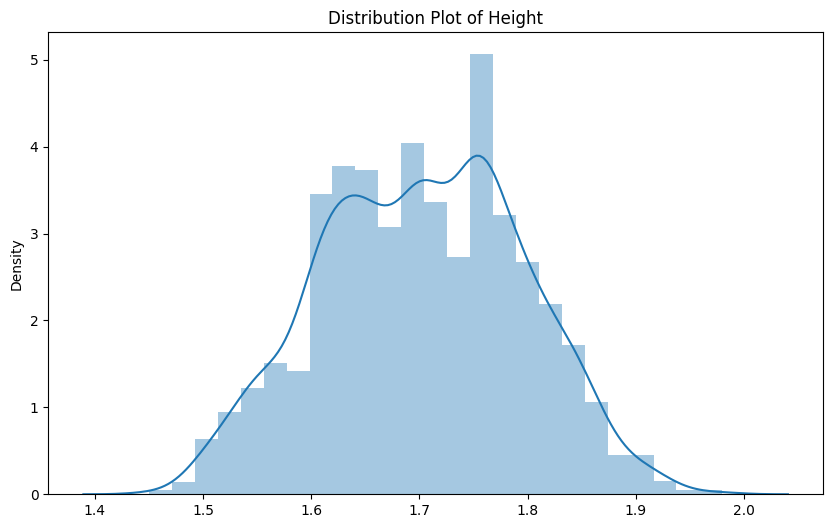

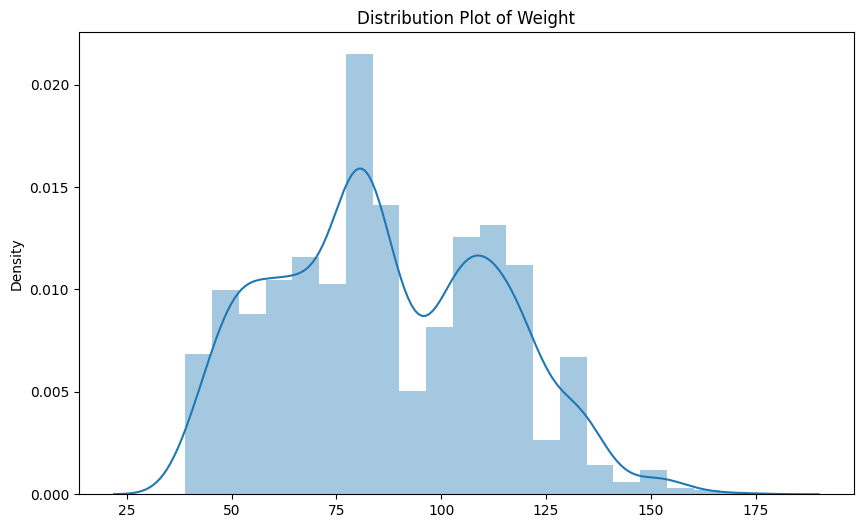

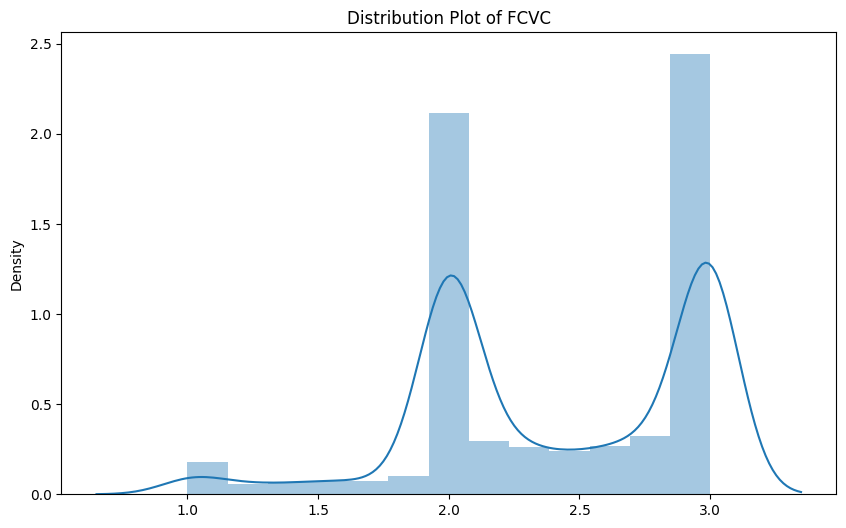

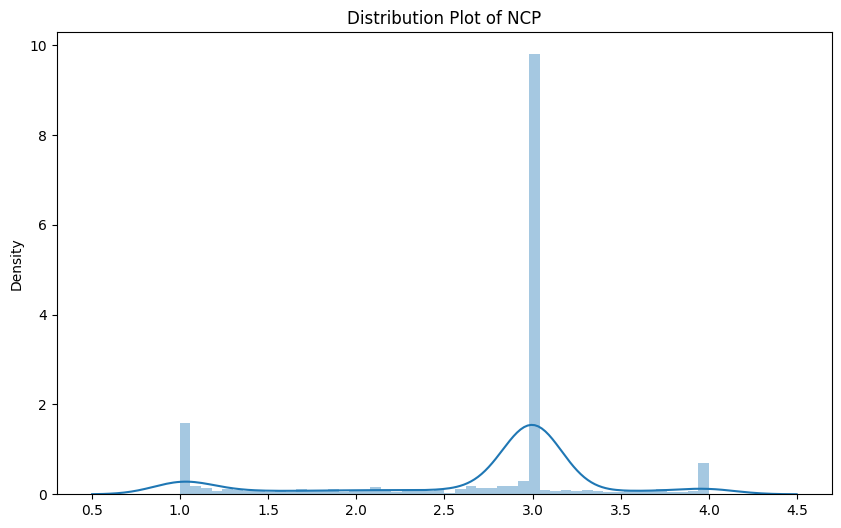

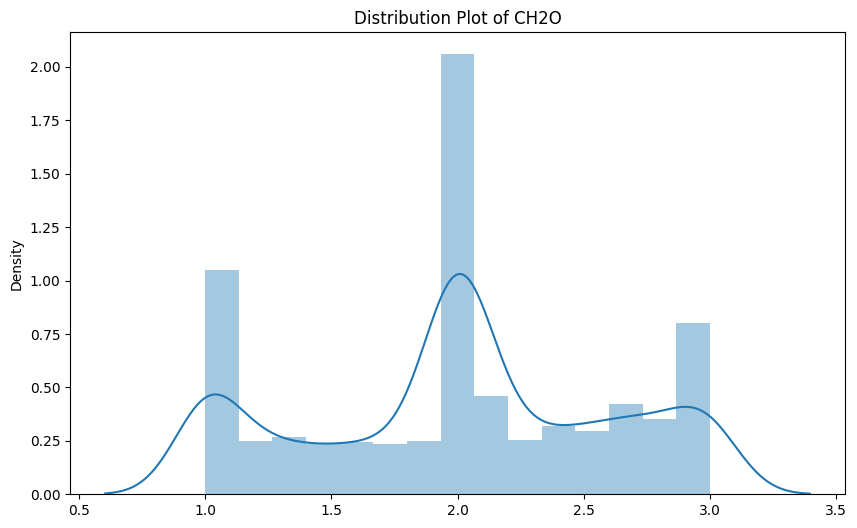

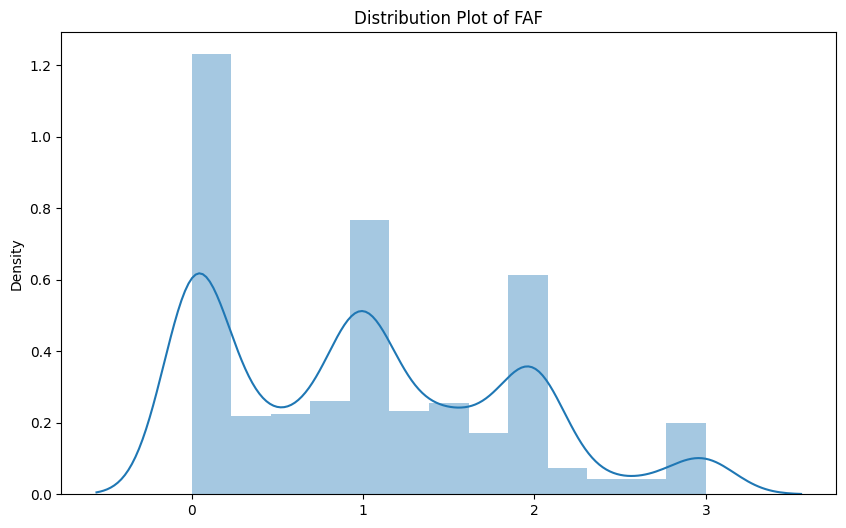

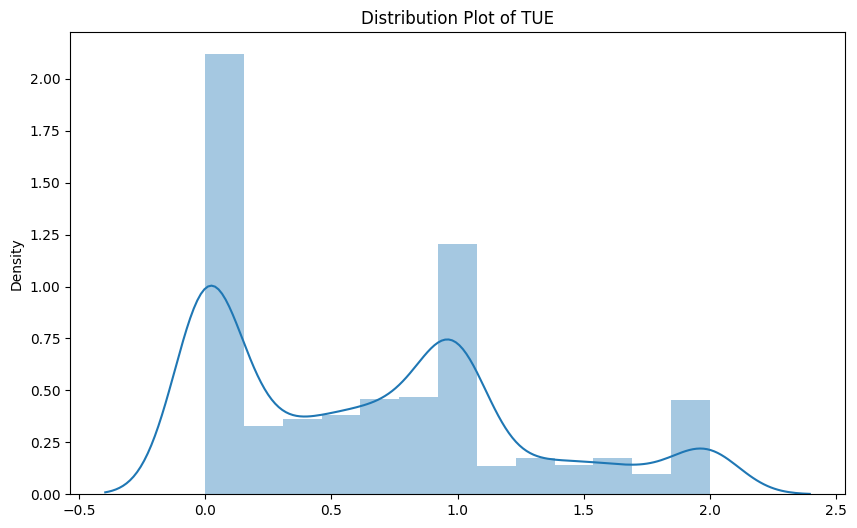

In [47]:
#numerical column distry bution
for col in num_col:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.title(f'Distribution Plot of {col}')
  plt.show()

In [48]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Obesity'],
      dtype='object')

#***Encoding:-***

In [49]:
le=LabelEncoder()
encoder={}
for col in cate_col:
  df[col]=le.fit_transform(df[col])
  encoder[col]=le

In [50]:
encoder

{'Gender': LabelEncoder(),
 'family_history': LabelEncoder(),
 'FAVC': LabelEncoder(),
 'CAEC': LabelEncoder(),
 'SMOKE': LabelEncoder(),
 'SCC': LabelEncoder(),
 'CALC': LabelEncoder(),
 'MTRANS': LabelEncoder(),
 'Obesity': LabelEncoder()}

#***Correlation:-***

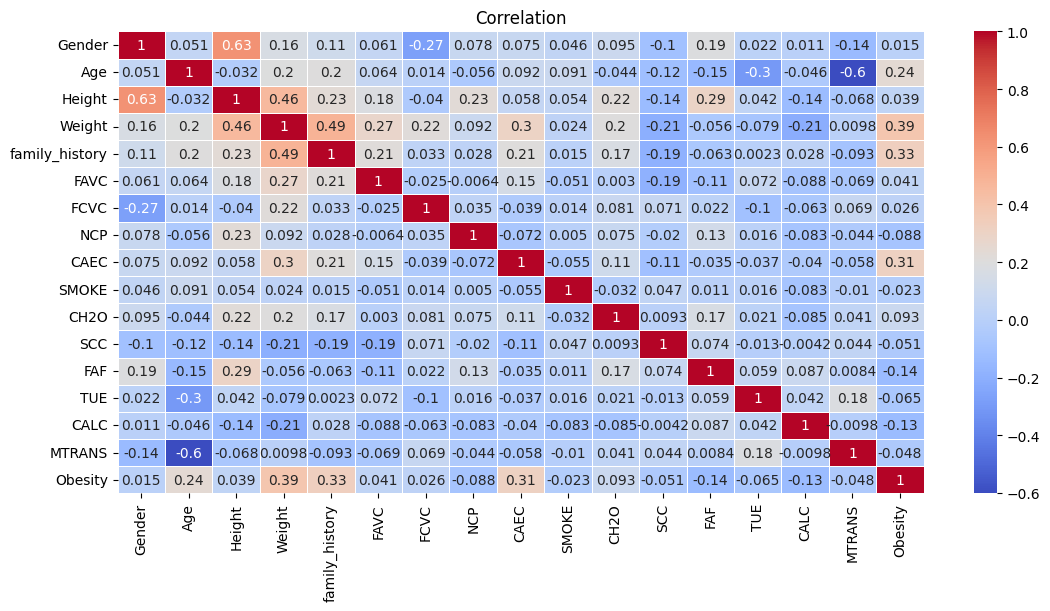

In [51]:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation")
plt.show()

#***Spliting in to X,y:-***

In [52]:
X=df.drop('Obesity',axis=1)
y=df['Obesity']

In [53]:
y.value_counts()

,count
Obesity,
2,351
4,324
3,297
6,290
1,282
5,276
0,267


#***Spliting In to Train & Test:-***

In [54]:
#spliting dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
#Shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1669, 16)
(418, 16)
(1669,)
(418,)


#***Choose Best Model:-***

In [64]:
# Models to evaluate
models = {
    "XGBoost": XGBClassifier(),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

In [66]:
# Dictionary to store accuracy results
accuracy_results = {}

In [67]:
# Evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

In [68]:
# Print the model accuracy results
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.9737
Random Forest Accuracy: 0.9545
Logistic Regression Accuracy: 0.6364
SVM Accuracy: 0.5885


In [69]:
# You can also evaluate the best model based on accuracy score
best_model = max(accuracy_results, key=accuracy_results.get)
print(f"Best Model based on accuracy: {best_model}")

Best Model based on accuracy: XGBoost


#***Building Best Model:-***

In [73]:
xg_model=XGBClassifier()
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#***Save Model & Encoder:-***

In [74]:
import joblib
joblib.dump(xg_model,'xg_model.pkl')

['xg_model.pkl']

In [75]:
joblib.dump(encoder,'encoder.pkl')

['encoder.pkl']